# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.















\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

def v_inicial(theta, v0):
  v0x = vo*np.cos(theta)
  v0y = vo*np.sin(theta)
  return v0x, v0y

def pos_x(t, v0x, b):
  posx_ = (v0x / b) * (1 - np.exp(-b*t))
  return posx_

def pos_y(t, v0y, b):
  T1 = (1/b)*(g/b + v0y)*(1-np.exp(-b*t))
  T2 = (g/b)*t
  posy_ = T1-T2
  return posy_

def plot_graph_parabolico():
  # Create the plots
  plt.figure(figsize=(18, 5))
  # Plot 1: x vs y
  plt.subplot(1, 3, 1)
  plt.plot(X, Y)
  plt.xlabel("x (m)", fontsize=14)
  plt.ylabel("y (m)", fontsize=14)
  plt.title("x vs y", fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.grid(True)


  # Plot 2: y vs t
  plt.subplot(1, 3, 2)
  plt.plot(t, Y)
  plt.xlabel("t (s)", fontsize=14)
  plt.ylabel("y (m)", fontsize=14)
  plt.title("y vs t", fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.hlines(0,0,8.6, color='r')
  plt.grid(True)

  # Plot 3: x vs t
  plt.subplot(1, 3, 3)
  plt.plot(t, X)
  plt.xlabel("t (s)", fontsize=14)
  plt.ylabel("x (m)", fontsize=14)
  plt.title("x vs t", fontsize=14)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.tight_layout()
  plt.grid(True)
  plt.show()

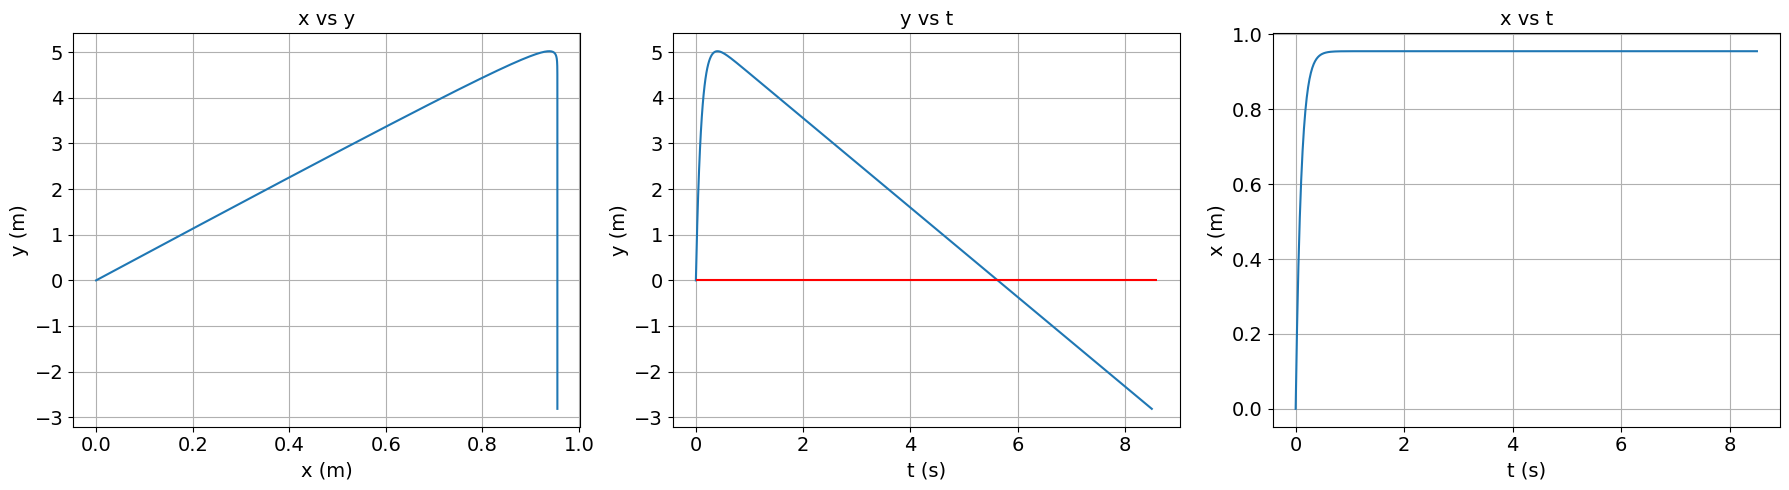

4.534192286258537
4.728592752147186


In [ ]:
g = 9.8  # Aceleracion de la gracedad m/s2
vo = 55   #rapidez incial
b = 10  # parametro de friccion
theta = np.radians(80)
v0x, v0y = v_inicial(theta, vo)
t=np.linspace(0,8.5, 1000)
X = pos_x(t, v0x, b)
Y = pos_y(t, v0y, b)
plot_graph_parabolico()
print(pos_y(1, v0y, b))
print(pos_y(.8, v0y, b))

In [ ]:
root = optimize.root_scalar(pos_y ,args=( v0x, b), x0=5)
raiz1= root.root
print('raiz para y vs t =',raiz1)
print('posicion maxima =', pos_x(raiz1, v0x, b))

raiz para y vs t = 1.074532946976027
posicion maxima = 0.9550443995252997


\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

In [ ]:
g = 9.8  # Aceleracion de la gracedad m/s2
vo = 40   #rapidez incial
b = 0.005   #friccion

theta=np.linspace(np.pi/8, np.pi/2,10)

def pos_y(t, v0y, b):
  T1 = (1/b)*(g/b + v0y)*(1-np.exp(-b*t))
  T2 = (g/b)*t
  posy_ = T1-T2
  return posy_

def pos_x(t, v0x, b):
  posx_ = (v0x / b) * (1 - np.exp(-b*t))
  return posx_

array_R= []

for i in theta:
  v0x, v0y = v_inicial(i, vo)

  tiempos= np.linspace(1,100, 1000)
  posiciones = np.array(pos_y(tiempos, v0y, b))
  indice_maximo = np.argmax(posiciones)
  semilla = tiempos[indice_maximo +1]
  print('angulo=', i, '||   semilla:' ,semilla,)

  root = optimize.root_scalar(pos_y ,args=( v0x, b), x0=semilla )
  raiz1= root.root
  array_R.append(raiz1)

#print(array_R)

angulo= 0.39269908169872414 ||   semilla: 1.6936936936936937
angulo= 0.5235987755982988 ||   semilla: 2.09009009009009
angulo= 0.6544984694978735 ||   semilla: 2.5855855855855854
angulo= 0.7853981633974483 ||   semilla: 2.981981981981982
angulo= 0.916297857297023 ||   semilla: 3.279279279279279
angulo= 1.0471975511965976 ||   semilla: 3.5765765765765765
angulo= 1.1780972450961724 ||   semilla: 3.873873873873874
angulo= 1.308996938995747 ||   semilla: 3.972972972972973
angulo= 1.4398966328953218 ||   semilla: 4.072072072072072
angulo= 1.5707963267948966 ||   semilla: 4.171171171171171


In [ ]:
g = 9.8  # Aceleracion de la gracedad m/s2
vo = 40   #rapidez incial
b = 0.009   #friccion


array_R= []
array_raiz=[]

for i in range(5,90,5):
  theta = np.radians(i) #theta en radianes

  #calculo de las velocidades en "x" y "y"
  Vx = vo*np.cos(theta) #velocidad en x
  Vy = vo*np.sin(theta) #velocidad en y

  def pos_y(t):
    y= (1/b)*((g/b)+Vy)*(1-np.exp(-b*t)) - (g/b)*t
    return y

  def pos_y(t):
    y= (1/b)*((g/b)+Vy)*(1-np.exp(-b*t)) - (g/b)*t
    return y

  def pos_x(t):
    posx_ = (Vx / b) * (1 - np.exp(-b*t))
    return posx_

  Rmax = (Vx / b)*20 # valor teorico de T sin restrinccion del aire
  #print(pos_y(.1))
  #print(pos_y(Rmax))

  root = optimize.root_scalar(pos_y, method='brentq', bracket=[.1, Rmax], xtol=1e-6, rtol=1e-6)
  Raiz = root.root

  array_R.append(pos_x(Raiz))
  array_raiz.append(Raiz)


In [ ]:
print(array_R)
print(array_raiz)

[np.float64(28.23014811010905), np.float64(55.36859725432918), np.float64(80.6091671190837), np.float64(103.21229463385168), np.float64(122.52569752121249), np.float64(138.00196708568657), np.float64(149.21265567389472), np.float64(155.85876373800767), np.float64(157.7773803588061), np.float64(154.94428205540504), np.float64(147.47289652247358), np.float64(135.60942018643925), np.float64(119.72460477093112), np.float64(100.30212128430325), np.float64(77.92439505527409), np.float64(53.25586033477652), np.float64(27.024159238257635)]
[0.7107177673675488, 1.4145346769754212, 2.106154730336256, 2.780405319234534, 3.432274342442383, 4.056944994845548, 4.649826321715563, 5.206584178438573, 5.723170371766792, 6.195844279930827, 6.621198937129507, 6.996179314213863, 7.31810477497212, 7.584676266349575, 7.79399612158617, 7.9445804778543145, 8.035358552410614]


##Ultimo inciso

Text(0.5, 1.0, 'distancia maxima en funcion del tiempo de vuelo')

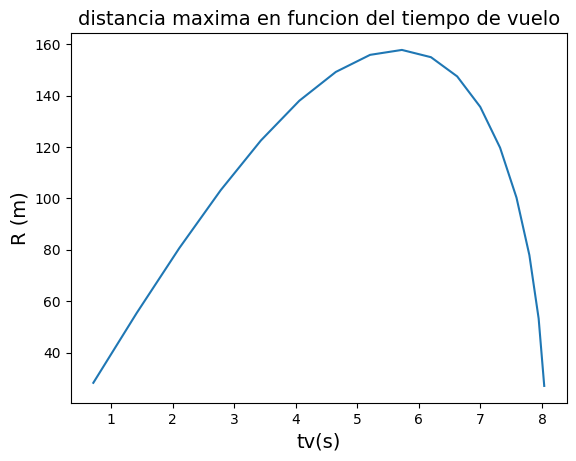

In [ ]:
plt.plot(array_raiz, array_R)
plt.xlabel("tv(s)", fontsize=14)
plt.ylabel("R (m)", fontsize=14)
plt.title("distancia maxima en funcion del tiempo de vuelo", fontsize=14)